1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



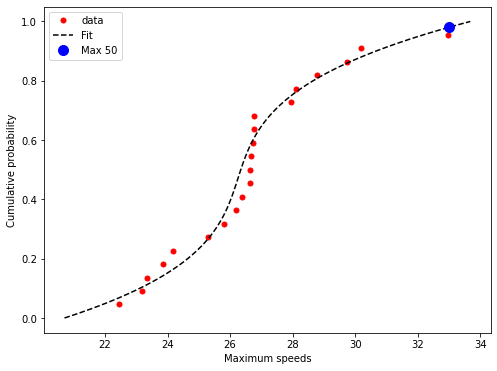

In [16]:
import numpy as np
from matplotlib import pyplot as plt

#Load the dataset
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

years = np.arange(1,22)
cprob = years/22

#Sort the maximum speed dataset
sort_max_speeds = np.sort(max_speeds)

#Plot of annual wind speed maxima vs cumulative probability
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sort_max_speeds, cprob, ".r", markersize=10, label="data")

#We use the UnivariateSpline to estimate the quantile function
from scipy.interpolate import UnivariateSpline
quantile_func = UnivariateSpline(cprob, sort_max_speeds)

#Define points of the fit function
fit_probs = np.linspace(0, 1, 100)
fitted_max_speeds = quantile_func(fit_probs)

#Now we evaluate the max speed for a probability of 98%
prob_50 = 1-0.02
speed_50 = quantile_func(prob_50)

ax.plot(fitted_max_speeds, fit_probs, "--k", label='Fit')
ax.plot(speed_50, prob_50, ".b", markersize=20, label='Max 50')
ax.set_ylabel('Cumulative probability')
ax.set_xlabel('Maximum speeds')
ax.legend()


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Time offset for maxT:  6.7358160783378835 +- 0.07946776079787257
Time offset for minT:  6.7358160783378835 +- 0.04720701267109971

 Compability between the two:  4.638123528276446  => they are not the same within the fit accuracy


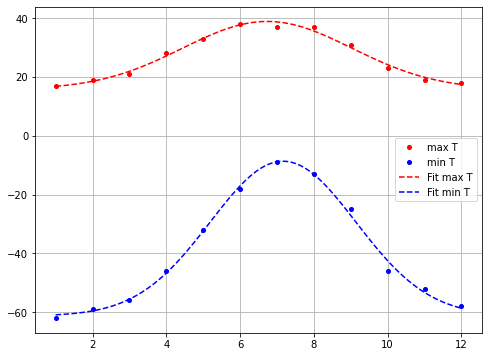

In [28]:
from scipy.optimize import curve_fit


#Creat dataset for max e mim temperatures

max_t = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_t = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
max_t = np.array(max_t)
min_t = np.array(min_t)
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.plot(months, max_t, ".r", markersize=8, label='max T')
ax.plot(months, min_t, ".b", markersize=8, label='min T')

# Define a function that can describe min and max temperatures
#Let's suppose a Gaussian fuction
def gaussian(x, A, mu, std, c):
    return A*np.exp(-(x-mu)**2/(2*std**2))+c

#Fit the two temperatures
max_p0=[20, 6, 3, 15]
min_p0=[40, 6, 3, -60]
max_p, max_cov = curve_fit(gaussian, months, max_t, max_p0)
min_p, min_cov = curve_fit(gaussian, months, min_t, min_p0)

#Plot the results from the fit

x_fit = np.linspace(1,12,100) 
max_fit = gaussian(x_fit, *max_p) 
min_fit = gaussian(x_fit, *min_p)
ax.plot(x_fit, max_fit, "--r", label='Fit max T')
ax.plot(x_fit, min_fit, "--b", label='Fit min T')
ax.legend()

# Is the time offset (which basically means mu parameter) for min and max temperatures the same within the fit accuracy?
#So we compare mu parameter for the two sets
print("Time offset for maxT: ",max_p[1], "+-" , np.sqrt(max_cov[1,1]))
print("Time offset for minT: ",max_p[1], "+-" , np.sqrt(min_cov[1,1]))
comp = abs(max_p[1]-min_p[1])/np.sqrt(max_cov[1,1]+min_cov[1,1])
print("\n Compability between the two: " , comp , " => they are not the same within the fit accuracy")

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


The first minima found is [-0.08984202  0.71265641] with value: -1.0316284534898768
The first minima found is [-0.08984202  0.71265641] with value: -1.0316284534898768
The minima with initial guess (0, 0) is [0. 0.]


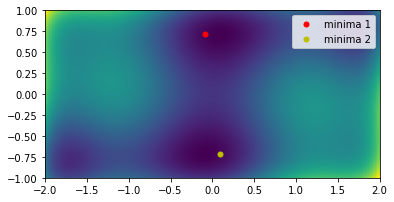

In [41]:
from scipy.optimize import minimize

def f(X):
    x = X[0]
    y = X[1]
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

mesh = np.meshgrid(x, y)
plt.imshow(f(mesh), extent=(-2, 2, -1, 1)) #Without extent it goes from 0 to 100

#Find the global minima being helped by the mesh plot... we guess that there are two minima

minima_l = []
minima = minimize(f , (0,0.75))  
#minima object is composed of several voices... fun is the value while x is an array with its coordinates
print("The first minima found is", minima["x"], "with value:", minima["fun"])
plt.plot(minima["x"][0], minima["x"][1], ".r", markersize = 10 , label="minima 1")
minima_l.append(minima)

minima2 = minimize(f , (0,-0.75))  
print("The first minima found is", minima["x"], "with value:", minima["fun"])
plt.plot(minima2["x"][0], minima2["x"][1], ".y", markersize = 10 ,  label="minima 2")
minima_l.append(minima2)

# What happens for an initial guess of (x, y) = (0, 0)?
solution = minimize(f, (0, 0))
print("The minima with initial guess (0, 0) is", solution["x"]) #It is a seddle point and it does not work

plt.legend()



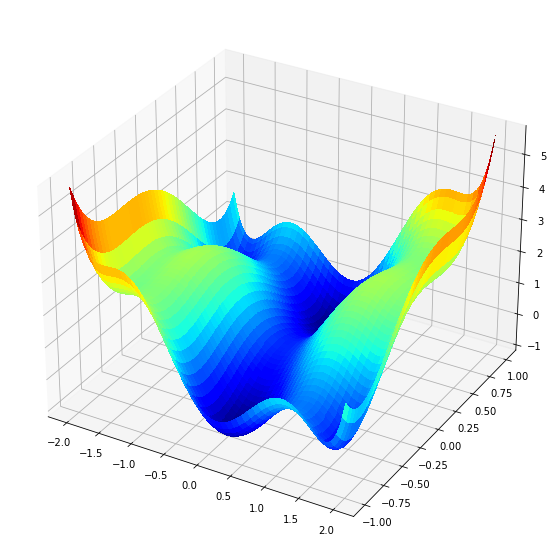

In [42]:
#What follows is useless
# Plot the surface for a better interpretation
#%matplotlib widget
%matplotlib inline

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(mesh[0], mesh[1], f(mesh), cmap="jet",
                       linewidth=0, antialiased=False)

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

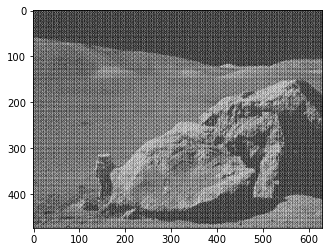

In [71]:
import pylab

#Load the image using pylab

img = pylab.imread("moonlanding.png")
pylab.imshow(img, cmap = 'gray')
pylab.show()


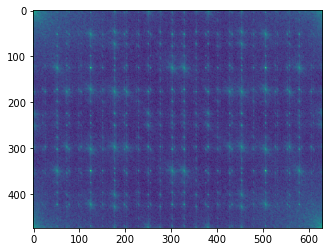

In [72]:
from scipy import fftpack
from matplotlib.colors import LogNorm

#Perform a 2D FFT 

img_fft = fftpack.fft2(img)
#Some dtype of such image are complex!..Also with abs i still can't see anything.. few very high points-> log must be used
pylab.imshow(np.abs(img_fft), norm=LogNorm(vmin=5, vmax=np.abs(img_fft).max()))



Text(0, 0.5, 'counts/bin')

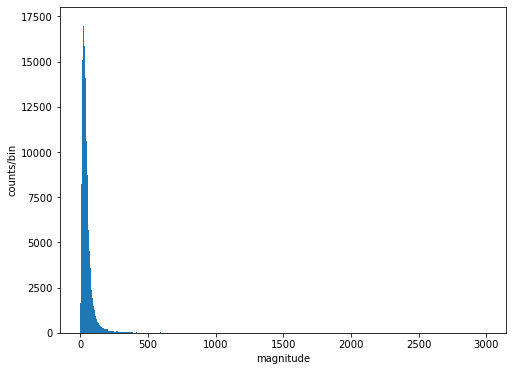

In [73]:
# Inspect the spectrum, and try to locate the regions of the power spectrum 
# that contain the signal and those which contain the periodic noise


magnitudes = np.reshape(np.abs(img_fft), (np.prod(img_fft.shape)))   #np.prod returns product of the two cardinalities -> number of elements

#Plot an histogram to understan which frequencies are the most relevant
fig , ax = plt.subplots(figsize=(8,6))
ax.hist(magnitudes, bins=1000, range=[0,3000])
ax.set_xlabel("magnitude")
ax.set_ylabel("counts/bin")



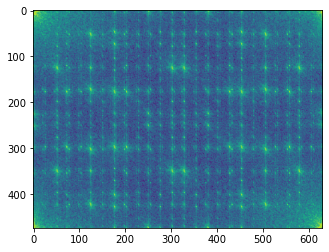

In [82]:
# Trying to cancel out higher magnitude regions
filtered_img_fft = img_fft.copy()
filtered_img_fft[np.abs(img_fft)>1800]=0
pylab.imshow(np.abs(filtered_img_fft), norm=LogNorm(vmin=5, vmax=np.abs(filtered_img_fft).max()))


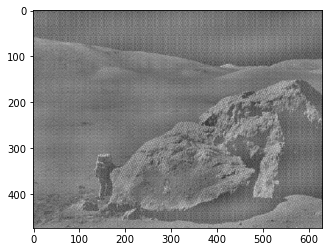

In [83]:
#Apply inverse FFT

# Apply the inverse Fourier transform to plot the resulting image
filtered_img = np.real(fftpack.ifft2(filtered_img_fft))
pylab.imshow(filtered_img, cmap = 'gray')
pylab.show()